In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community.community_louvain as community_louvain
from IPython.display import clear_output

In [ ]:
social_network = nx.read_edgelist('facebook_combined.txt.gz', nodetype=int)

In [ ]:
pos = nx.spring_layout(social_network, seed=25,  k=0.06)

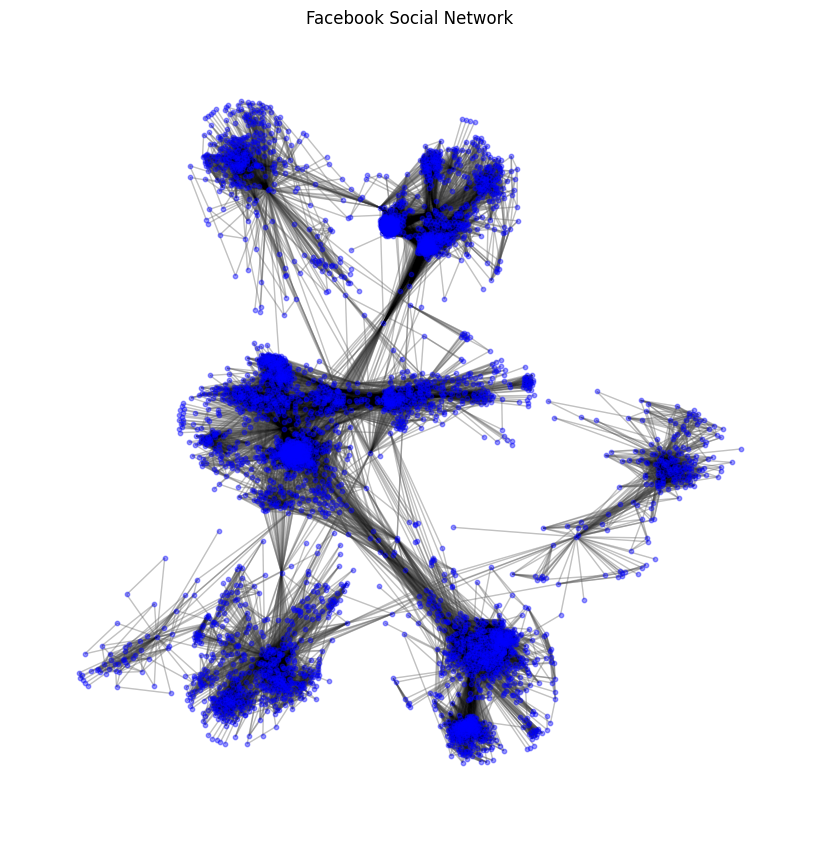

In [ ]:
plt.figure(figsize=(8, 8))
nx.draw(social_network, pos, with_labels=False, node_size=10, node_color='blue', edge_color='gray', alpha=0.4)
nx.draw_networkx_edges(social_network, pos, alpha=0.05)
plt.title("Facebook Social Network")
plt.show()

In [ ]:
adjacency_matrix = nx.to_numpy_array(social_network)

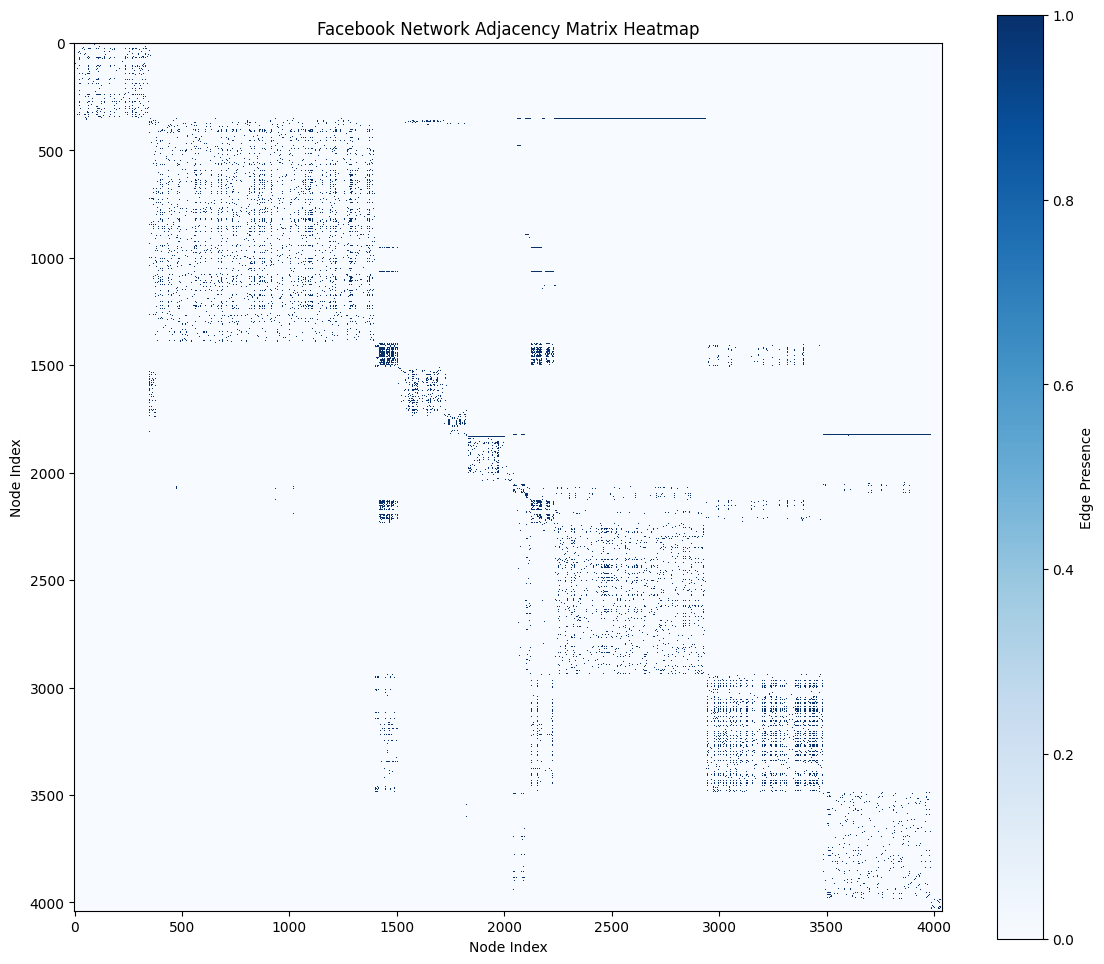

In [ ]:
plt.figure(figsize=(14, 12))
plt.imshow(adjacency_matrix, cmap='Blues', interpolation='nearest', )
plt.colorbar(label='Edge Presence')
plt.title('Facebook Network Adjacency Matrix Heatmap')
plt.xlabel('Node Index')
plt.ylabel('Node Index')
plt.show()

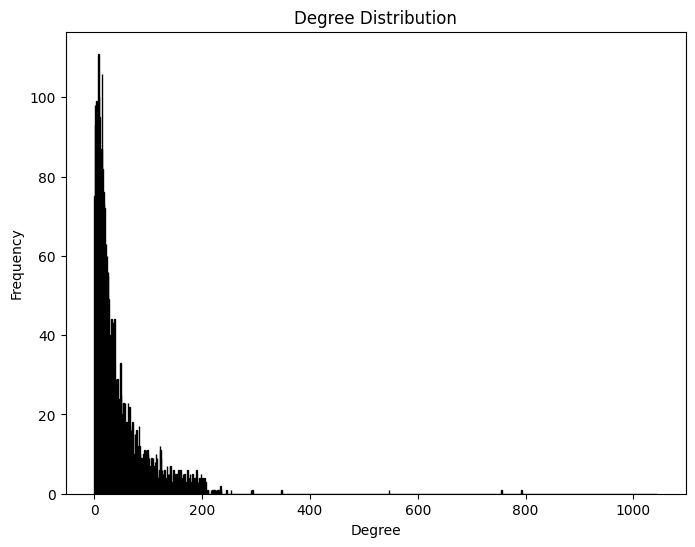

In [ ]:
degrees = [social_network.degree(n) for n in social_network.nodes()]

plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.arange(0, max(degrees)+1) - 0.5, edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()


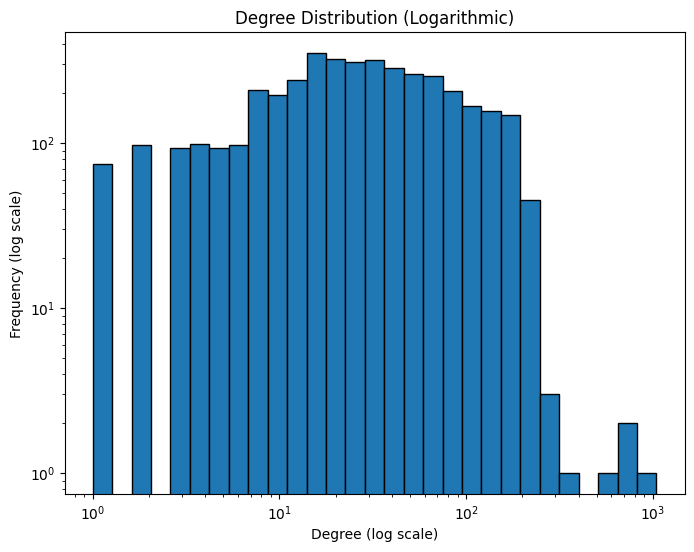

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.logspace(0, np.log10(max(degrees)), 30), edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Degree Distribution (Logarithmic)')
plt.show()

In [ ]:
clustering_coefficients = nx.clustering(social_network)
average_clustering_coefficient = np.mean(list(clustering_coefficients.values()))
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")


Average Clustering Coefficient: 0.6055


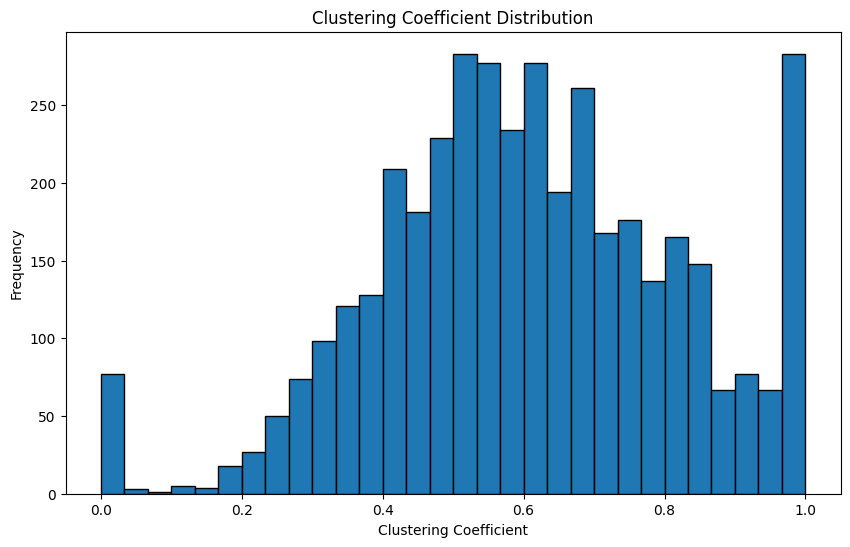

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(clustering_coefficients.values(), bins=30, edgecolor='black')
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

In [ ]:
eigen_centrality = nx.eigenvector_centrality(social_network)
print("Eigenvalue Centrality:")
print(eigen_centrality)

Eigenvalue Centrality:
{0: 3.391796172270201e-05, 1: 6.045346134948107e-07, 2: 2.2334609371911966e-07, 3: 6.635648083921052e-07, 4: 2.2364157028893605e-07, 5: 1.1833221118435216e-06, 6: 2.1709041695161263e-07, 7: 2.568510124822489e-05, 8: 2.1973746334830285e-07, 9: 2.214116624486093e-06, 10: 7.708567044092624e-07, 11: 2.1031233303459666e-07, 12: 2.1031233303459666e-07, 13: 1.103790547598573e-06, 14: 2.3055679294325335e-07, 15: 2.1031233303459666e-07, 16: 2.616513592117462e-07, 17: 2.2774170298520142e-07, 18: 2.1031233303459666e-07, 19: 2.3149092118602842e-07, 20: 2.3038875741121886e-07, 21: 2.5965755464539663e-05, 22: 1.0365420550578182e-06, 23: 2.327855955467465e-07, 24: 2.4875636881516775e-07, 25: 2.0920477409908786e-06, 26: 2.333621078244131e-06, 27: 3.8500493368810947e-07, 28: 2.276328150659143e-07, 29: 2.9276633115487333e-07, 30: 9.62912044010581e-07, 31: 1.4530295555049823e-06, 32: 2.172656002138456e-07, 33: 2.1162712130634827e-07, 34: 4.074184547679874e-06, 35: 2.117140285304049

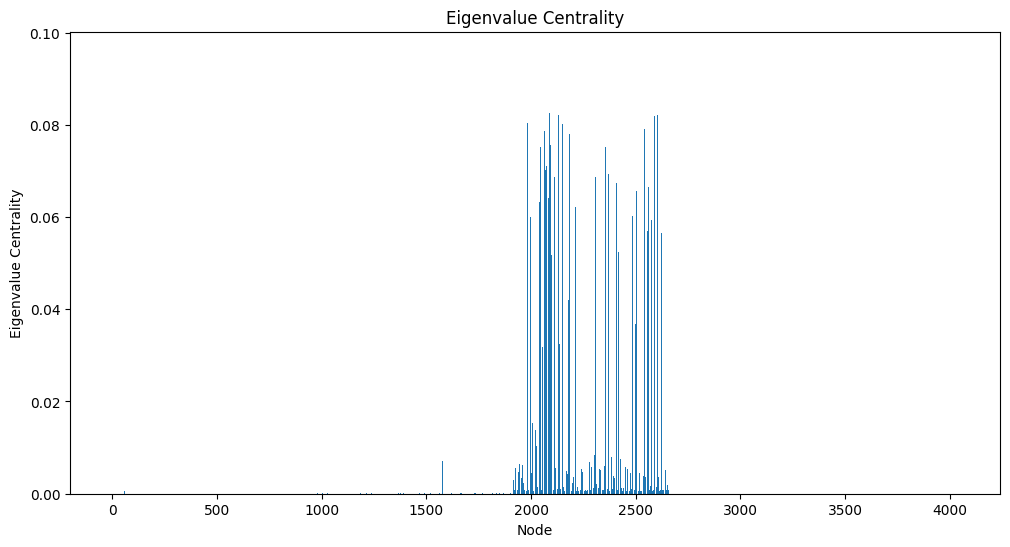

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(eigen_centrality.keys(), eigen_centrality.values())
plt.xlabel('Node')
plt.ylabel('Eigenvalue Centrality')
plt.title('Eigenvalue Centrality')
plt.show()

In [ ]:
closeness_centrality = nx.closeness_centrality(social_network)
print("Closeness Centrality:")
print(closeness_centrality)

Closeness Centrality:
{0: 0.35334266713335666, 1: 0.2613761408505405, 2: 0.26125776397515527, 3: 0.2613761408505405, 4: 0.26125776397515527, 5: 0.2613084837895554, 6: 0.26119016817593793, 7: 0.2747686445291236, 8: 0.2612239617026782, 9: 0.2620546433902265, 10: 0.26125776397515527, 11: 0.26110572259941806, 12: 0.26110572259941806, 13: 0.26161321671525756, 14: 0.2613423079412336, 15: 0.26110572259941806, 16: 0.2612408617454875, 17: 0.2613084837895554, 18: 0.26110572259941806, 19: 0.2613592233009709, 20: 0.2613423079412336, 21: 0.2756125861715924, 22: 0.2612746683921061, 23: 0.2613761408505405, 24: 0.2613592233009709, 25: 0.26225888160031174, 26: 0.26224184959085595, 27: 0.2611732746911584, 28: 0.2613084837895554, 29: 0.2613084837895554, 30: 0.2613761408505405, 31: 0.2614776921582594, 32: 0.26119016817593793, 33: 0.26112260734609416, 34: 0.3033125516412529, 35: 0.26112260734609416, 36: 0.2612746683921061, 37: 0.26110572259941806, 38: 0.2612408617454875, 39: 0.2613423079412336, 40: 0.26183

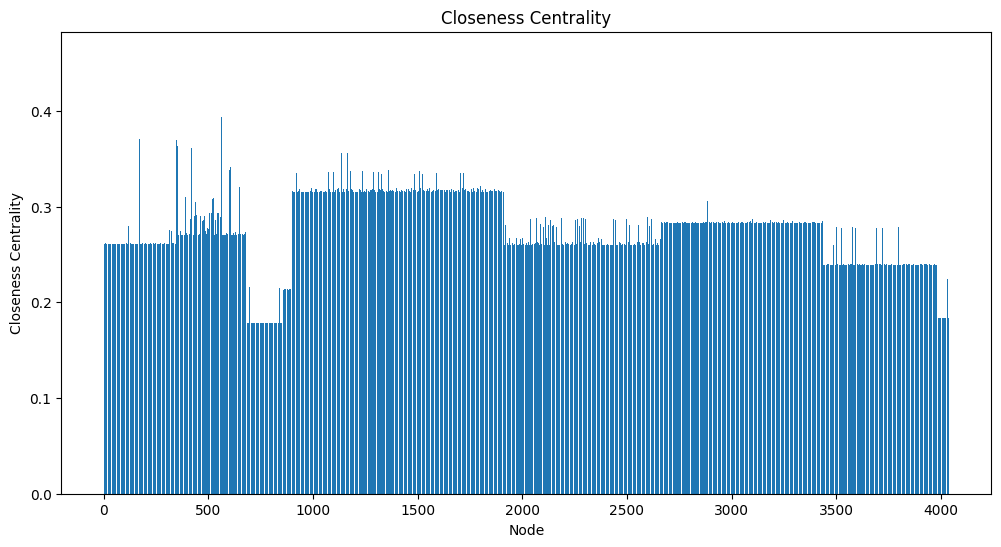

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(closeness_centrality.keys(), closeness_centrality.values())
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality')
plt.show()

In [ ]:
betweenness_centrality = nx.betweenness_centrality(social_network)
print("Betweenness Centrality:")
print(betweenness_centrality)

Betweenness Centrality:
{0: 0.14630592147442917, 1: 2.7832744209034606e-06, 2: 7.595021178512074e-08, 3: 1.6850656559280464e-06, 4: 1.8403320547933104e-07, 5: 2.205964164092193e-06, 6: 2.4537760730577472e-08, 7: 0.0001702984836730339, 8: 2.7604980821899654e-07, 9: 1.6454236303026905e-05, 10: 4.986739552037655e-08, 11: 0.0, 12: 0.0, 13: 1.7622717578436846e-06, 14: 5.582871686568508e-07, 15: 0.0, 16: 1.9979459275532697e-07, 17: 4.1066669000480344e-07, 18: 0.0, 19: 5.062957964075819e-06, 20: 6.793693332142838e-07, 21: 0.0009380243844653233, 22: 6.703002200833232e-07, 23: 6.860348937590618e-06, 24: 1.3673472422981514e-07, 25: 5.38808313945586e-05, 26: 1.935436798204632e-05, 27: 3.067220091322184e-08, 28: 3.812160659244892e-07, 29: 1.3954817951917517e-06, 30: 1.3694627409316544e-06, 31: 4.932641252790837e-06, 32: 0.0, 33: 0.0, 34: 0.0036020881281963652, 35: 0.0, 36: 2.726417858953052e-08, 37: 0.0, 38: 7.344481172858835e-07, 39: 9.548632622274015e-07, 40: 1.3796059569123122e-05, 41: 4.673274

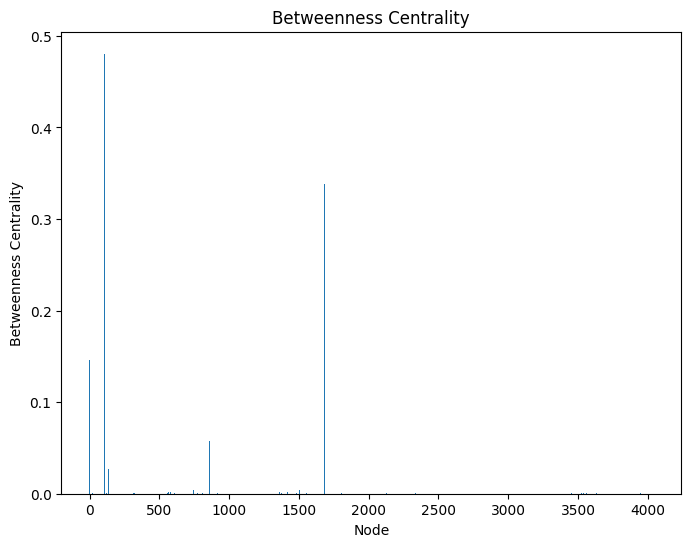

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values())
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality')
plt.show()

In [ ]:
degree_centrality = nx.degree_centrality(social_network)

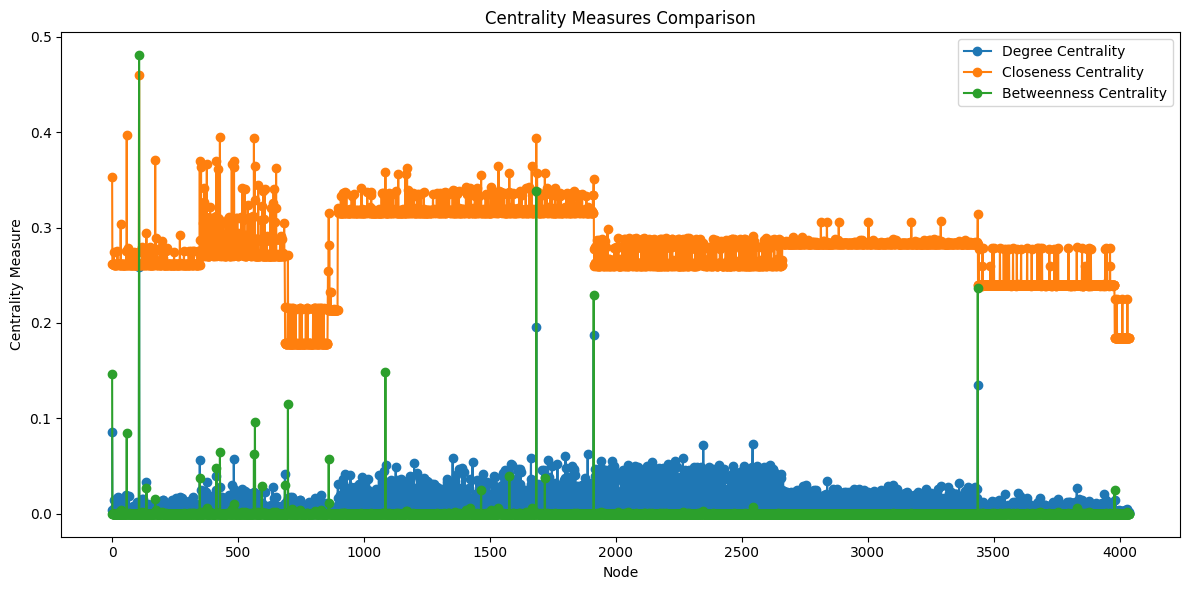

In [ ]:
plt.figure(figsize=(12, 6))
centrality_measures = {
    'Degree Centrality': degree_centrality,
    'Closeness Centrality': closeness_centrality,
    'Betweenness Centrality': betweenness_centrality,
}

for measure_name, measure in centrality_measures.items():
    x, y = zip(*sorted(measure.items()))
    plt.plot(x, y, marker='o', linestyle='-', label=measure_name)

plt.xlabel('Node')
plt.ylabel('Centrality Measure')
plt.title('Centrality Measures Comparison')
plt.legend()
plt.tight_layout()
plt.show()

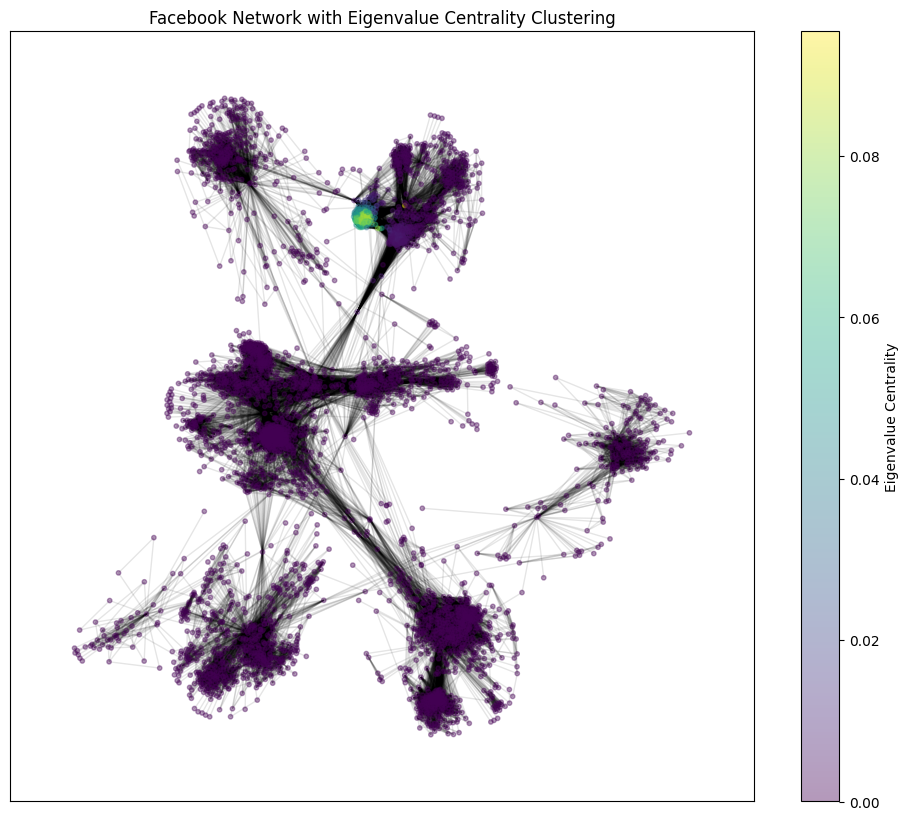

In [ ]:
plt.figure(figsize=(12, 10))
node_colors = list(eigen_centrality.values())
nodes = nx.draw_networkx_nodes(social_network, pos, node_size=10, cmap=plt.cm.viridis,
                               node_color=node_colors, nodelist=list(eigen_centrality.keys()), alpha=0.4)
nx.draw_networkx_edges(social_network, pos, alpha=0.1)

plt.colorbar(nodes, label='Eigenvalue Centrality')
plt.title("Facebook Network with Eigenvalue Centrality Clustering")
plt.show()

In [ ]:
partition = community_louvain.best_partition(social_network)

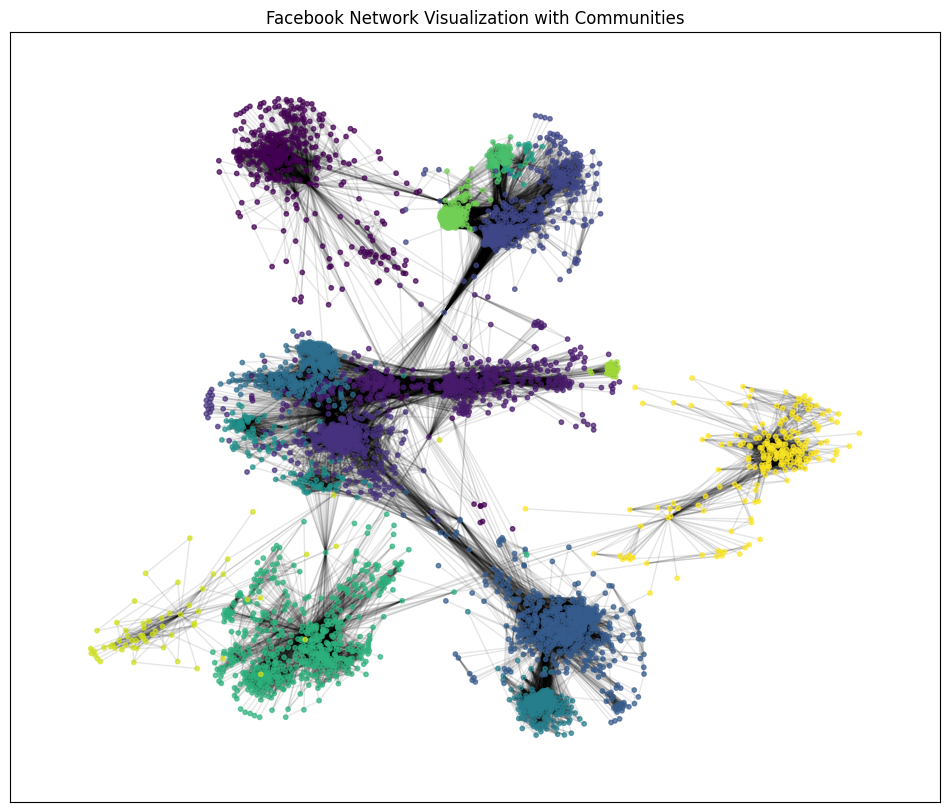

In [ ]:
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(social_network, pos, partition.keys(), node_size=10, cmap=cmap, node_color=list(partition.values()), alpha=0.7)
nx.draw_networkx_edges(social_network, pos, alpha=0.1)
plt.title("Facebook Network Visualization with Communities")
plt.show()

In [ ]:
def display_network(G, pos, seed_nodes, activated_nodes, activated_next, step, model_name):
    plt.figure(figsize=(8, 6))
    inactive_nodes = set(G.nodes()) - activated_nodes
    activated_nodes_only = activated_nodes - set(seed_nodes)

    inactive_nodes = set(G.nodes()) - activated_nodes
    nx.draw_networkx_nodes(G, pos, nodelist=inactive_nodes, node_color='gray', node_size=10, alpha=0.5)

    # Plot seed nodes (blue)
    nx.draw_networkx_nodes(G, pos, nodelist=seed_nodes, node_color='blue', node_size=10)

    # Plot activated nodes (red)
    activated_nodes_only = activated_nodes - set(seed_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=activated_nodes_only, node_color='red', node_size=10, alpha=0.6)

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3)



    plt.title(f'{model_name} Model Simulation - Step {step}')
    plt.show()

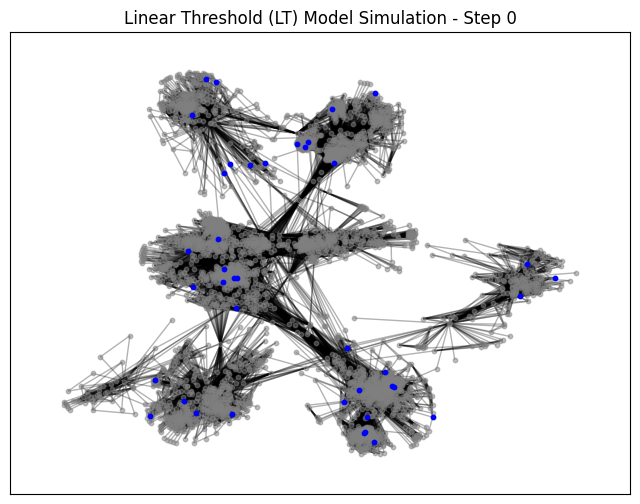

In [ ]:
plt.ion()
thresholds = {node: np.random.rand() for node in social_network.nodes()}

# select seed nodes randomly
seed_nodes = np.random.choice(social_network.nodes(), 40, replace=False)

activated_nodes = set(seed_nodes)
activated_next = set(seed_nodes)
already_attempted = set()

step = 0
while activated_next:
    clear_output(wait=True)
    display_network(social_network, pos, seed_nodes, activated_nodes, activated_next, step, "Linear Threshold (LT)")

    newly_activated = []
    for node in activated_next:
        if node not in already_attempted:
            neighbors = set(social_network.neighbors(node))
            active_neighbors = neighbors.intersection(activated_nodes)
            influence = len(active_neighbors) / len(neighbors)
            if influence * 4 > thresholds[node]:
                print("activated", node)
                newly_activated.extend(neighbors - activated_nodes)
            already_attempted.add(node)

    activated_nodes.update(newly_activated)
    activated_next = set(newly_activated)

    step += 1





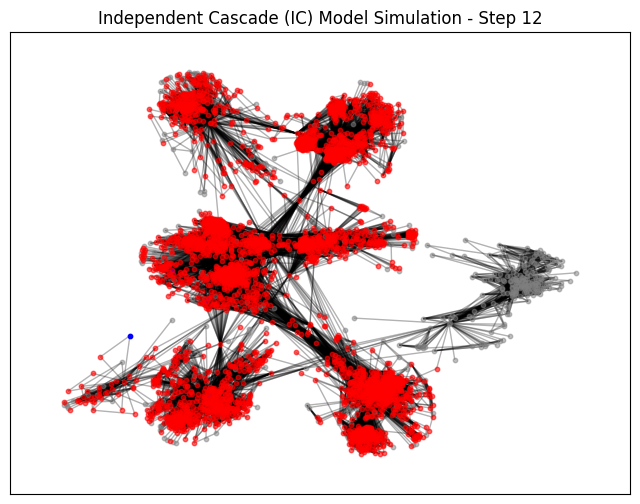

In [ ]:
plt.ion()
probabilities = {(u, v): np.random.rand() for (u, v) in social_network.edges()}

# Select two seed nodes randomly
seed_nodes = np.random.choice(social_network.nodes(), 10, replace=False)

# Perform IC model simulation step by step
activated_nodes = set(seed_nodes)
activated_next = set(seed_nodes)
activation_steps = [set(seed_nodes)]
already_attempted = set()


step = 0
while activated_next:
    clear_output(wait=True)
    display_network(social_network, pos, seed_nodes, activated_nodes, activated_next, step, "Independent Cascade (IC)")
    newly_activated = []
    for node in activated_next:
        for neighbor in social_network.neighbors(node):
            if neighbor not in activated_nodes:
                if np.random.rand() < probabilities.get((node, neighbor), 0.05):  # probability of node succeeding in its try to activate its neighbour
                    newly_activated.append(neighbor)

    step += 1
    already_attempted.add(node)
    activated_nodes.update(newly_activated)
    activated_next = set(newly_activated)
    activation_steps.append(set(activated_nodes))